# RECONNAISSANCE DES IMAGES 

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # for visualization 
import tensorflow as tf
from tensorflow import keras

# CLASSIFICATIONS DES IMAGES SUR DOSSIERS 

In [22]:
import os
import shutil

# Dossier d'origine contenant toutes les images
source_dir = "vehicules/vehicules"

# Nouveau dossier où tu veux trier les images par classe
dest_dir = "dataset"

# Créer les dossiers cibles (s'ils n'existent pas)
for label in ["front", "back", "left", "right"]:
    os.makedirs(os.path.join(dest_dir, label), exist_ok=True)

# Parcourir les fichiers et les trier
for filename in os.listdir(source_dir):
    name = filename.lower()

    if name.startswith("front"):
        label = "front"
    elif name.startswith("back"):
        label = "back"
    elif name.startswith("left"):
        label = "left"
    elif name.startswith("right"):
        label = "right"
    else:
        continue  # Ignorer si le nom ne correspond à rien

    shutil.copy(
        os.path.join(source_dir, filename),
        os.path.join(dest_dir, label, filename)
    )

print(" Images triées avec succès dans 'dataset/'")


 Images triées avec succès dans 'dataset/'


# CREATIONS DU MODELS D'INTELLIGENCE ARTIFFICIELLE POUR LA RECONNAISSANCE D'IMAGES 

Found 39 images belonging to 4 classes.
Found 8 images belonging to 4 classes.
Classes : ['back', 'front', 'left', 'right']


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.2833 - loss: 1.8325 - val_accuracy: 0.3750 - val_loss: 1.5468
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 813ms/step - accuracy: 0.2818 - loss: 1.7864 - val_accuracy: 0.3750 - val_loss: 1.2657
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 801ms/step - accuracy: 0.3368 - loss: 1.6321 - val_accuracy: 0.3750 - val_loss: 1.5520
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 781ms/step - accuracy: 0.3643 - loss: 1.6217 - val_accuracy: 0.6250 - val_loss: 1.1884
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 750ms/step - accuracy: 0.2543 - loss: 1.4901 - val_accuracy: 0.5000 - val_loss: 1.5413
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 750ms/step - accuracy: 0.3301 - loss: 1.5665 - val_accuracy: 0.5000 - val_loss: 1.3319
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - accuracy: 0.3643 - loss: 1.6026 - val_accuracy: 0.3750 - val_loss: 1.2684
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3687 - loss: 1.3261 - val_accuracy: 0.5000 - val_loss: 1.0850
Epoch 9/

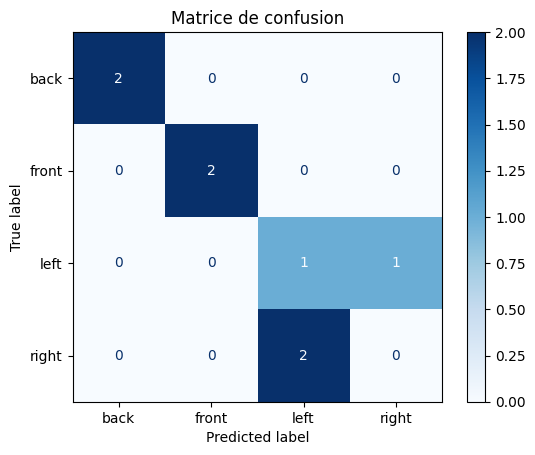

Modèle sauvegardé dans 'model_voiture_professionnel.keras'


In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2  # Modèle pré-entraîné 
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- 1. Chemins et paramètres ---

dataset_dir = "dataset"   # dossier avec sous-dossiers front, back, left, right
img_size = (224, 224)
batch_size = 32
num_classes = 4

# --- 2. Préparation des données ---

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Classes :", class_names)

# --- 3. Construction du modèle ---

base_model = MobileNetV2(input_shape=img_size + (3,),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Geler les poids pré-entraînés

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- 4. Entraînement initial ---

epochs_initial = 10
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs_initial
)

# --- 5. Fine-tuning ---

base_model.trainable = True

# Ne débloquer que les dernières couches (exemple: 30 dernières)
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs_finetune = 10
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs_finetune
)

# --- 6. Évaluation détaillée ---

val_gen.reset()
predictions = model.predict(val_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = val_gen.classes

print("Classification Report :")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# --- 7. Sauvegarde du modèle ---

model.save("model_voiture_professionnel.keras")
print("Modèle sauvegardé dans 'model_voiture_professionnel.keras'")

# --- 8. Fonction prédiction sur image unique ---

def predict_image(model, img_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    preds = model.predict(img_array)
    idx = np.argmax(preds[0])
    class_pred = class_names[idx]
    confidence = preds[0][idx]

    print(f"Image : {img_path}")
    print(f"Classe prédite : {class_pred} (probabilité : {confidence:.2f})")
    return class_pred, confidence

# Exemple d'utilisation :  
# predict_image(model, "chemin/vers/image_test.jpg")


#  pour prédire une image unique

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Charger le modèle sauvegardé
model = tf.keras.models.load_model("model_voiture_professionnel.keras")

# Classes (dans l'ordre du modèle)
class_names = ["back", "front", "left", "right"]  # adapte selon ton dataset

# Chemin de l'image à prédire
img_path = "dataset/left/LEFT_1732093686340343.jpg" # remplace par le chemin réel

# Charger l'image et la redimensionner à 224x224
img = image.load_img(img_path, target_size=(224, 224))

# Convertir en tableau numpy
img_array = image.img_to_array(img)

# Ajouter la dimension batch (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Prétraitement spécifique MobileNetV2
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Faire la prédiction
preds = model.predict(img_array)

# Trouver l'indice de la classe prédite
predicted_class_idx = np.argmax(preds[0])

# Afficher le résultat
print(f"Classe prédite : {class_names[predicted_class_idx]} avec une probabilité de {preds[0][predicted_class_idx]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classe prédite : left avec une probabilité de 0.43


In [2]:
import streamlit as st
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import io
from PIL import Image

# Charger le modèle entraîné
model_path = "model_voiture_professionnel.keras"
model = load_model(model_path)

# Correspondance des classes
class_names = ['back', 'front', 'left', 'right']   # ajuste si tes classes sont dans un autre ordre

# Taille d’image attendue
img_size = (224, 224)

st.title("Détection de Vue de Voiture")
st.write("Téléversez une photo de voiture (face, arrière, gauche ou droite), et le modèle prédit la vue correspondante.")

uploaded_file = st.file_uploader("Choisissez une image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Lire l'image uploadée
    image_data = uploaded_file.read()
    pil_img = Image.open(io.BytesIO(image_data)).convert("RGB")
    
    st.image(pil_img, caption="Image chargée", use_column_width=True)
    
    # Prétraitement pour MobileNetV2
    img_resized = pil_img.resize(img_size)
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    
    # Prédiction
    preds = model.predict(img_array)
    idx = np.argmax(preds[0])
    class_pred = class_names[idx]
    confidence = preds[0][idx]
    
    st.write(f"**Classe prédite :** {class_pred}")
    st.write(f"**Probabilité :** {confidence:.2f}")


2025-07-15 16:48:21.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 16:48:21.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar